<a href="https://colab.research.google.com/github/UtkarshAIITB/IPL-Data-Analysis/blob/main/models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Reading Data

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
ball = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/IPL Score_Analysis/CSV/IPL Ball-by-Ball 2008-2020.csv')
print(ball.shape)
ball.head()                  #displays ball by ball data of each match from 2008-2020

(193468, 18)


,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
0,335982,1,6,5,RT Ponting,BB McCullum,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
1,335982,1,6,6,BB McCullum,RT Ponting,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
2,335982,1,7,1,BB McCullum,RT Ponting,Z Khan,0,0,0,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
3,335982,1,7,2,BB McCullum,RT Ponting,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
4,335982,1,7,3,RT Ponting,BB McCullum,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore


In [4]:
match = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/IPL Score_Analysis/CSV/IPL Matches 2008-2020.csv')
print(match.shape)
match.head()           #displays the list and result of all matches from 2008 - 2020

(816, 17)


,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,SJ Davis,DJ Harper
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,NaN,BF Bowden,K Hariharan


Merging the two dataframes

In [5]:
df = pd.merge(match , ball, on='id', how = 'right')
print(df.shape)
df.head()

(193468, 34)


,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen,1,6,5,RT Ponting,BB McCullum,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
1,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen,1,6,6,BB McCullum,RT Ponting,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
2,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen,1,7,1,BB McCullum,RT Ponting,Z Khan,0,0,0,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
3,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen,1,7,2,BB McCullum,RT Ponting,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
4,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen,1,7,3,RT Ponting,BB McCullum,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore


# PreProcessing Data

In [6]:
df.columns

Index(['id', 'city', 'date', 'player_of_match', 'venue', 'neutral_venue',
       'team1', 'team2', 'toss_winner', 'toss_decision', 'winner', 'result',
       'result_margin', 'eliminator', 'method', 'umpire1', 'umpire2', 'inning',
       'over', 'ball', 'batsman', 'non_striker', 'bowler', 'batsman_runs',
       'extra_runs', 'total_runs', 'non_boundary', 'is_wicket',
       'dismissal_kind', 'player_dismissed', 'fielder', 'extras_type',
       'batting_team', 'bowling_team'],
      dtype='object')

In [7]:
# df.info()
#date is an object and not datetime
df['date'] = pd.to_datetime(df['date'])
# df.info()

In [8]:
df['team1'].unique()

array(['Royal Challengers Bangalore', 'Kings XI Punjab',
       'Delhi Daredevils', 'Mumbai Indians', 'Kolkata Knight Riders',
       'Rajasthan Royals', 'Deccan Chargers', 'Chennai Super Kings',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Gujarat Lions', 'Rising Pune Supergiants',
       'Rising Pune Supergiant', 'Delhi Capitals'], dtype=object)

In [9]:
df = df.replace(['Rising Pune Supergiant' , 'Rising Pune Supergiants', 'Delhi Daredevils'], ['Pune Warriors' , 'Pune Warriors', 'Delhi Capitals'])
# df['team2'] = df['team2'].replace(['Rising Pune Supergiant' , 'Rising Pune Supergiants', 'Delhi Daredevils'], ['Pune Warriors' , 'Pune Warriors', 'Delhi Capitals'])

In [10]:
df['year'] = pd.DatetimeIndex(df['date']).year
df.head()

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team,year
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen,1,6,5,RT Ponting,BB McCullum,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore,2008
1,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen,1,6,6,BB McCullum,RT Ponting,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore,2008
2,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen,1,7,1,BB McCullum,RT Ponting,Z Khan,0,0,0,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore,2008
3,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen,1,7,2,BB McCullum,RT Ponting,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore,2008
4,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen,1,7,3,RT Ponting,BB McCullum,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore,2008


In [11]:
# df.to_csv('export1.csv')

In [12]:
df['method'].unique()
#can apply hot encoding

array([nan, 'D/L'], dtype=object)

In [13]:
columns = ['neutral_venue', 'result', 'result_margin', 'umpire1', 'umpire2', 'batsman', 'non_striker', 'bowler', 'non_boundary', 'dismissal_kind',
           'player_dismissed', 'fielder', 'extras_type', 'player_of_match', 'venue', 'city']
df_run = df.drop(columns = columns)
df_run.head()

,id,date,team1,team2,toss_winner,toss_decision,winner,eliminator,method,inning,over,ball,batsman_runs,extra_runs,total_runs,is_wicket,batting_team,bowling_team,year
0,335982,2008-04-18,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,N,NaN,1,6,5,1,0,1,0,Kolkata Knight Riders,Royal Challengers Bangalore,2008
1,335982,2008-04-18,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,N,NaN,1,6,6,1,0,1,0,Kolkata Knight Riders,Royal Challengers Bangalore,2008
2,335982,2008-04-18,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,N,NaN,1,7,1,0,0,0,0,Kolkata Knight Riders,Royal Challengers Bangalore,2008
3,335982,2008-04-18,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,N,NaN,1,7,2,1,0,1,0,Kolkata Knight Riders,Royal Challengers Bangalore,2008
4,335982,2008-04-18,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,N,NaN,1,7,3,1,0,1,0,Kolkata Knight Riders,Royal Challengers Bangalore,2008


Filling Null values in the method column and then applying hotencoding

In [14]:
df_run['method']  = df_run['method'].fillna('Normal')
df_run.head()

,id,date,team1,team2,toss_winner,toss_decision,winner,eliminator,method,inning,over,ball,batsman_runs,extra_runs,total_runs,is_wicket,batting_team,bowling_team,year
0,335982,2008-04-18,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,N,Normal,1,6,5,1,0,1,0,Kolkata Knight Riders,Royal Challengers Bangalore,2008
1,335982,2008-04-18,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,N,Normal,1,6,6,1,0,1,0,Kolkata Knight Riders,Royal Challengers Bangalore,2008
2,335982,2008-04-18,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,N,Normal,1,7,1,0,0,0,0,Kolkata Knight Riders,Royal Challengers Bangalore,2008
3,335982,2008-04-18,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,N,Normal,1,7,2,1,0,1,0,Kolkata Knight Riders,Royal Challengers Bangalore,2008
4,335982,2008-04-18,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,N,Normal,1,7,3,1,0,1,0,Kolkata Knight Riders,Royal Challengers Bangalore,2008


In [15]:
df_run['method'].value_counts()

Normal    190260
D/L         3208
Name: method, dtype: int64

In [16]:
df_run['eliminator'].value_counts()

N    189871
Y      3225
Name: eliminator, dtype: int64

In [17]:
df_run.isna().sum()

id                 0
date               0
team1              0
team2              0
toss_winner        0
toss_decision      0
winner           372
eliminator       372
method             0
inning             0
over               0
ball               0
batsman_runs       0
extra_runs         0
total_runs         0
is_wicket          0
batting_team       0
bowling_team     191
year               0
dtype: int64

In [18]:
df_run.shape    #before removing null values

(193468, 19)

In [19]:
winner_null = df_run[df_run['winner'].isna()]
winner_null
#we can safely drop winner_null

,id,date,team1,team2,toss_winner,toss_decision,winner,eliminator,method,inning,over,ball,batsman_runs,extra_runs,total_runs,is_wicket,batting_team,bowling_team,year
57048,501265,2011-05-21,Delhi Capitals,Pune Warriors,Delhi Capitals,bat,NaN,NaN,Normal,1,0,1,1,0,1,0,Delhi Capitals,NaN,2011
57049,501265,2011-05-21,Delhi Capitals,Pune Warriors,Delhi Capitals,bat,NaN,NaN,Normal,1,0,2,0,1,1,0,Delhi Capitals,NaN,2011
57050,501265,2011-05-21,Delhi Capitals,Pune Warriors,Delhi Capitals,bat,NaN,NaN,Normal,1,1,1,0,1,1,0,Delhi Capitals,NaN,2011
57051,501265,2011-05-21,Delhi Capitals,Pune Warriors,Delhi Capitals,bat,NaN,NaN,Normal,1,1,2,0,0,0,0,Delhi Capitals,NaN,2011
57052,501265,2011-05-21,Delhi Capitals,Pune Warriors,Delhi Capitals,bat,NaN,NaN,Normal,1,1,3,0,0,0,0,Delhi Capitals,NaN,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176345,1178424,2019-04-30,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,NaN,NaN,Normal,2,1,2,6,0,6,0,Rajasthan Royals,Royal Challengers Bangalore,2019
176346,1178424,2019-04-30,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,NaN,NaN,Normal,2,1,3,1,0,1,0,Rajasthan Royals,Royal Challengers Bangalore,2019
176347,1178424,2019-04-30,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,NaN,NaN,Normal,2,1,4,1,0,1,0,Rajasthan Royals,Royal Challengers Bangalore,2019
176348,1178424,2019-04-30,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,NaN,NaN,Normal,2,1,5,0,0,0,0,Rajasthan Royals,Royal Challengers Bangalore,2019


The null values in winner correspond to the no result of the match, maybe due to the rains or unsuitable weather conditions

In [20]:
df_run = df_run.dropna()
df_run.isna().sum()

id               0
date             0
team1            0
team2            0
toss_winner      0
toss_decision    0
winner           0
eliminator       0
method           0
inning           0
over             0
ball             0
batsman_runs     0
extra_runs       0
total_runs       0
is_wicket        0
batting_team     0
bowling_team     0
year             0
dtype: int64

In [21]:
df_run.head()

,id,date,team1,team2,toss_winner,toss_decision,winner,eliminator,method,inning,over,ball,batsman_runs,extra_runs,total_runs,is_wicket,batting_team,bowling_team,year
0,335982,2008-04-18,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,N,Normal,1,6,5,1,0,1,0,Kolkata Knight Riders,Royal Challengers Bangalore,2008
1,335982,2008-04-18,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,N,Normal,1,6,6,1,0,1,0,Kolkata Knight Riders,Royal Challengers Bangalore,2008
2,335982,2008-04-18,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,N,Normal,1,7,1,0,0,0,0,Kolkata Knight Riders,Royal Challengers Bangalore,2008
3,335982,2008-04-18,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,N,Normal,1,7,2,1,0,1,0,Kolkata Knight Riders,Royal Challengers Bangalore,2008
4,335982,2008-04-18,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,N,Normal,1,7,3,1,0,1,0,Kolkata Knight Riders,Royal Challengers Bangalore,2008


# Sorting

In [22]:
df_sort = df_run.sort_values(by = ['id', 'inning', 'over', 'ball'])
df_sort.head()

,id,date,team1,team2,toss_winner,toss_decision,winner,eliminator,method,inning,over,ball,batsman_runs,extra_runs,total_runs,is_wicket,batting_team,bowling_team,year
79,335982,2008-04-18,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,N,Normal,1,0,1,0,1,1,0,Kolkata Knight Riders,Royal Challengers Bangalore,2008
80,335982,2008-04-18,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,N,Normal,1,0,2,0,0,0,0,Kolkata Knight Riders,Royal Challengers Bangalore,2008
81,335982,2008-04-18,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,N,Normal,1,0,3,0,1,1,0,Kolkata Knight Riders,Royal Challengers Bangalore,2008
82,335982,2008-04-18,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,N,Normal,1,0,4,0,0,0,0,Kolkata Knight Riders,Royal Challengers Bangalore,2008
83,335982,2008-04-18,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,N,Normal,1,0,5,0,0,0,0,Kolkata Knight Riders,Royal Challengers Bangalore,2008


In [23]:
print(df_sort.shape)
print(df_run.shape)

(193096, 19)
(193096, 19)


In [24]:
# df_sort.to_csv('final_data.csv')
df_sort = df_sort.reset_index()
df_sort = df_sort.drop(columns = 'index')
df_sort.head()

,id,date,team1,team2,toss_winner,toss_decision,winner,eliminator,method,inning,over,ball,batsman_runs,extra_runs,total_runs,is_wicket,batting_team,bowling_team,year
0,335982,2008-04-18,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,N,Normal,1,0,1,0,1,1,0,Kolkata Knight Riders,Royal Challengers Bangalore,2008
1,335982,2008-04-18,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,N,Normal,1,0,2,0,0,0,0,Kolkata Knight Riders,Royal Challengers Bangalore,2008
2,335982,2008-04-18,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,N,Normal,1,0,3,0,1,1,0,Kolkata Knight Riders,Royal Challengers Bangalore,2008
3,335982,2008-04-18,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,N,Normal,1,0,4,0,0,0,0,Kolkata Knight Riders,Royal Challengers Bangalore,2008
4,335982,2008-04-18,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,N,Normal,1,0,5,0,0,0,0,Kolkata Knight Riders,Royal Challengers Bangalore,2008


In [25]:
print(df_sort.shape)

(193096, 19)


* Winner is dependent on the total runs therefore by intuition we can remove winner column <br>
* Combine over and ball into a single column <br>
* Need to make a column of total runs scored at that point <br>
* Apply hot encoding for eliminator and method column and toss decision <br>
* What to predict? - total runs by the current batting team <br>
* To make a new column that consisits of cumulative runs and a new column of total runs and a new column of total wickets fallen <br>
* Remove winner (will predict on the basis of total runs ourselves) <br>
* Do label encoding for teams on the basis of their performace as calculated in EDA <br>
* Remove batsman runs, extraruns, totalruns and is_wicket,year <br>
* Check dependency of date column for the result, the code below already convert the datetime to numerical 



In [26]:
# import datetime as dt
# df_run['date']=df_run['date'].map(dt.datetime.toordinal)    #date converted to numerical values for regression
# df_run.head()

## One hot encoding

In [27]:
dummy_td = pd.get_dummies(df_sort.toss_decision)
df_enc = pd.concat([df_sort, dummy_td], axis = 'columns')                     #encoded toss decisions - field or bat
df_enc = df_enc.drop(columns = ['toss_decision', 'bat', 'year'])
# df_enc.head()
dummy_td = pd.get_dummies(df_sort.method)
df_enc = pd.concat([df_enc, dummy_td], axis = 'columns')
df_enc = df_enc.drop(columns = ['method', 'Normal'])                          #encoded method - normal or D/L
# df_enc.head()
dummy_td = pd.get_dummies(df_sort.eliminator)
dummy_td.rename(columns = {'Y': 'eliminator?' }, inplace = True )
df_enc = pd.concat([df_enc, dummy_td], axis = 'columns')
df_enc = df_enc.drop(columns = ['eliminator', 'N'])  
df_enc.head()

,id,date,team1,team2,toss_winner,winner,inning,over,ball,batsman_runs,extra_runs,total_runs,is_wicket,batting_team,bowling_team,field,D/L,eliminator?
0,335982,2008-04-18,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,Kolkata Knight Riders,1,0,1,0,1,1,0,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0
1,335982,2008-04-18,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,Kolkata Knight Riders,1,0,2,0,0,0,0,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0
2,335982,2008-04-18,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,Kolkata Knight Riders,1,0,3,0,1,1,0,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0
3,335982,2008-04-18,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,Kolkata Knight Riders,1,0,4,0,0,0,0,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0
4,335982,2008-04-18,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,Kolkata Knight Riders,1,0,5,0,0,0,0,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0


In [28]:
df_enc.shape

(193096, 18)

Creating a new id on the basis of inning for calculating total score

In [29]:
df_enc['inning_bat'] = df_enc['id'].astype(str)+(df_enc['batting_team']).astype(str)
df_enc.head()

,id,date,team1,team2,toss_winner,winner,inning,over,ball,batsman_runs,extra_runs,total_runs,is_wicket,batting_team,bowling_team,field,D/L,eliminator?,inning_bat
0,335982,2008-04-18,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,Kolkata Knight Riders,1,0,1,0,1,1,0,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0,335982Kolkata Knight Riders
1,335982,2008-04-18,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,Kolkata Knight Riders,1,0,2,0,0,0,0,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0,335982Kolkata Knight Riders
2,335982,2008-04-18,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,Kolkata Knight Riders,1,0,3,0,1,1,0,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0,335982Kolkata Knight Riders
3,335982,2008-04-18,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,Kolkata Knight Riders,1,0,4,0,0,0,0,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0,335982Kolkata Knight Riders
4,335982,2008-04-18,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,Kolkata Knight Riders,1,0,5,0,0,0,0,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0,335982Kolkata Knight Riders


In [30]:
list1 = df_enc['inning_bat'].unique()
len(list1)

1624

In [31]:
list1

array(['335982Kolkata Knight Riders', '335982Royal Challengers Bangalore',
       '335983Chennai Super Kings', ..., '1237180Sunrisers Hyderabad',
       '1237181Delhi Capitals', '1237181Mumbai Indians'], dtype=object)

In [32]:
# df_enc.tail()

In [33]:
df_copy = df_enc.copy()
df_copy = df_copy.groupby(by = ['inning_bat']).sum()['total_runs'].reset_index()
df_copy.head()
#df_copy is giving correct total score; checked online

,inning_bat,total_runs
0,1082591Royal Challengers Bangalore,172
1,1082591Sunrisers Hyderabad,207
2,1082592Mumbai Indians,184
3,1082592Pune Warriors,187
4,1082593Gujarat Lions,183


In [34]:
df_copy.shape #shape remains the same as len(list1)

(1624, 2)

In [35]:
data = pd.merge(left=df_enc, right=df_copy, on='inning_bat', how='right')
print(data.shape)
data.head()

(193096, 20)


,id,date,team1,team2,toss_winner,winner,inning,over,ball,batsman_runs,extra_runs,total_runs_x,is_wicket,batting_team,bowling_team,field,D/L,eliminator?,inning_bat,total_runs_y
0,1082591,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,Sunrisers Hyderabad,2,0,1,1,0,1,0,Royal Challengers Bangalore,Sunrisers Hyderabad,1,0,0,1082591Royal Challengers Bangalore,172
1,1082591,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,Sunrisers Hyderabad,2,0,2,0,0,0,0,Royal Challengers Bangalore,Sunrisers Hyderabad,1,0,0,1082591Royal Challengers Bangalore,172
2,1082591,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,Sunrisers Hyderabad,2,0,3,0,0,0,0,Royal Challengers Bangalore,Sunrisers Hyderabad,1,0,0,1082591Royal Challengers Bangalore,172
3,1082591,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,Sunrisers Hyderabad,2,0,4,2,0,2,0,Royal Challengers Bangalore,Sunrisers Hyderabad,1,0,0,1082591Royal Challengers Bangalore,172
4,1082591,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,Sunrisers Hyderabad,2,0,5,4,0,4,0,Royal Challengers Bangalore,Sunrisers Hyderabad,1,0,0,1082591Royal Challengers Bangalore,172


In [36]:
data['over'] = data['over']+ (data['ball'])/10
data.drop(columns = ['ball'], inplace = True)
print(data.shape)
data.head()

(193096, 19)


,id,date,team1,team2,toss_winner,winner,inning,over,batsman_runs,extra_runs,total_runs_x,is_wicket,batting_team,bowling_team,field,D/L,eliminator?,inning_bat,total_runs_y
0,1082591,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,Sunrisers Hyderabad,2,0.1,1,0,1,0,Royal Challengers Bangalore,Sunrisers Hyderabad,1,0,0,1082591Royal Challengers Bangalore,172
1,1082591,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,Sunrisers Hyderabad,2,0.2,0,0,0,0,Royal Challengers Bangalore,Sunrisers Hyderabad,1,0,0,1082591Royal Challengers Bangalore,172
2,1082591,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,Sunrisers Hyderabad,2,0.3,0,0,0,0,Royal Challengers Bangalore,Sunrisers Hyderabad,1,0,0,1082591Royal Challengers Bangalore,172
3,1082591,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,Sunrisers Hyderabad,2,0.4,2,0,2,0,Royal Challengers Bangalore,Sunrisers Hyderabad,1,0,0,1082591Royal Challengers Bangalore,172
4,1082591,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,Sunrisers Hyderabad,2,0.5,4,0,4,0,Royal Challengers Bangalore,Sunrisers Hyderabad,1,0,0,1082591Royal Challengers Bangalore,172


In [37]:
df_final = pd.DataFrame()

## Adding cumulative runs and wickets

In [38]:
for bat in list1:
  inning  = data[data['inning_bat']==bat].copy()
  # inning.head()
  cum_total  = inning.loc[:,'total_runs_x'].cumsum(axis = 0)
  inning['cum_total'] = cum_total
  cum_wicket = inning.loc[:,'is_wicket'].cumsum(axis = 0)
  inning['cum_wicket'] = cum_wicket
  # inning.head()
  df_final = df_final.append(inning, ignore_index=True)


In [39]:
df_final.head()

,id,date,team1,team2,toss_winner,winner,inning,over,batsman_runs,extra_runs,total_runs_x,is_wicket,batting_team,bowling_team,field,D/L,eliminator?,inning_bat,total_runs_y,cum_total,cum_wicket
0,335982,2008-04-18,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,Kolkata Knight Riders,1,0.1,0,1,1,0,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0,335982Kolkata Knight Riders,222,1,0
1,335982,2008-04-18,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,Kolkata Knight Riders,1,0.2,0,0,0,0,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0,335982Kolkata Knight Riders,222,1,0
2,335982,2008-04-18,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,Kolkata Knight Riders,1,0.3,0,1,1,0,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0,335982Kolkata Knight Riders,222,2,0
3,335982,2008-04-18,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,Kolkata Knight Riders,1,0.4,0,0,0,0,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0,335982Kolkata Knight Riders,222,2,0
4,335982,2008-04-18,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,Kolkata Knight Riders,1,0.5,0,0,0,0,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0,335982Kolkata Knight Riders,222,2,0


In [40]:
# df_final.append(inning)
df_final.shape

(193096, 21)

## Label Encoding for teams

In [41]:
# df_final.to_csv('df_final.csv')
# f = df_final.copy()

In [42]:
# print(len(f['team1'].unique()))
# print(len(f['team2'].unique()))
# df['team1'].unique()

In [43]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
# f['team1']= le.fit_transform(f['team1'])
# print(f['team1'].unique())
# f.head()

In [44]:
# print(f['team2'].unique())
# f['team2']= le.fit_transform(f['team2'])
# print(f['team2'].unique())

## Manual Label Encoding
Assigning labels to teams on the basis of analysis carried out in EDA, so that even if the algorithm assumes some order it is well suited to the stronger team

In [45]:
team_dict = {'Mumbai Indians':12, 'Chennai Super Kings':11, 'Rajasthan Royals':10, 'Kolkata Knight Riders':9, 'Kings XI Punjab':8,
             'Sunrisers Hyderabad':7, 'Delhi Capitals':6, 'Royal Challengers Bangalore':5, 'Gujarat Lions':4, 'Deccan Chargers':3,
             'Pune Warriors':2, 'Kochi Tuskers Kerala':1
             }

In [46]:
bore = df_final.copy()
bore['team1'] = bore.team1.map(team_dict)
bore['team2'] = bore.team2.map(team_dict)
bore['toss_winner'] = bore.toss_winner.map(team_dict)
bore['winner'] = bore.winner.map(team_dict)
bore['batting_team'] = bore.batting_team.map(team_dict)
bore['bowling_team'] = bore.bowling_team.map(team_dict)
bore.head()

,id,date,team1,team2,toss_winner,winner,inning,over,batsman_runs,extra_runs,total_runs_x,is_wicket,batting_team,bowling_team,field,D/L,eliminator?,inning_bat,total_runs_y,cum_total,cum_wicket
0,335982,2008-04-18,5,9,5,9,1,0.1,0,1,1,0,9,5,1,0,0,335982Kolkata Knight Riders,222,1,0
1,335982,2008-04-18,5,9,5,9,1,0.2,0,0,0,0,9,5,1,0,0,335982Kolkata Knight Riders,222,1,0
2,335982,2008-04-18,5,9,5,9,1,0.3,0,1,1,0,9,5,1,0,0,335982Kolkata Knight Riders,222,2,0
3,335982,2008-04-18,5,9,5,9,1,0.4,0,0,0,0,9,5,1,0,0,335982Kolkata Knight Riders,222,2,0
4,335982,2008-04-18,5,9,5,9,1,0.5,0,0,0,0,9,5,1,0,0,335982Kolkata Knight Riders,222,2,0


In [47]:
bore.drop(columns = ['extra_runs', 'inning_bat', 'batsman_runs', 'total_runs_x', 'is_wicket'], inplace = True)
bore.head()

,id,date,team1,team2,toss_winner,winner,inning,over,batting_team,bowling_team,field,D/L,eliminator?,total_runs_y,cum_total,cum_wicket
0,335982,2008-04-18,5,9,5,9,1,0.1,9,5,1,0,0,222,1,0
1,335982,2008-04-18,5,9,5,9,1,0.2,9,5,1,0,0,222,1,0
2,335982,2008-04-18,5,9,5,9,1,0.3,9,5,1,0,0,222,2,0
3,335982,2008-04-18,5,9,5,9,1,0.4,9,5,1,0,0,222,2,0
4,335982,2008-04-18,5,9,5,9,1,0.5,9,5,1,0,0,222,2,0


In [48]:
bore.shape

(193096, 16)

In [49]:
# features = team1, team2, toss_winner, inning, over, batting_team, bowling_team, field, D/L. eliminator?, cum_total, cum_wicket
# total features = 12
# output1 = total_runs_y
# output2 = winner

In [50]:
go = bore.copy()
y2 = go['winner']
go.drop(columns = ['id', 'date', 'winner'], inplace = True)
go.head()

,team1,team2,toss_winner,inning,over,batting_team,bowling_team,field,D/L,eliminator?,total_runs_y,cum_total,cum_wicket
0,5,9,5,1,0.1,9,5,1,0,0,222,1,0
1,5,9,5,1,0.2,9,5,1,0,0,222,1,0
2,5,9,5,1,0.3,9,5,1,0,0,222,2,0
3,5,9,5,1,0.4,9,5,1,0,0,222,2,0
4,5,9,5,1,0.5,9,5,1,0,0,222,2,0


In [51]:
# X = go['total_runs_y']
# go.drop(columns = ['total_runs_y'], inplace = True)

In [52]:
y = go.iloc[:,-3].values
y = y.reshape(-1,1)
go.drop(columns = ['total_runs_y'], inplace = True)

In [53]:
print(y.shape)
print(go.shape)
go.head()

(193096, 1)
(193096, 12)


,team1,team2,toss_winner,inning,over,batting_team,bowling_team,field,D/L,eliminator?,cum_total,cum_wicket
0,5,9,5,1,0.1,9,5,1,0,0,1,0
1,5,9,5,1,0.2,9,5,1,0,0,1,0
2,5,9,5,1,0.3,9,5,1,0,0,2,0
3,5,9,5,1,0.4,9,5,1,0,0,2,0
4,5,9,5,1,0.5,9,5,1,0,0,2,0


In [54]:
X = go.copy()                   #features

# Accuracy Model

In [55]:
def custom_accuracy2(y_test,y_pred,thresold):
    right = 0
    l = len(y_pred)
    for i in range(0,l):
        if(abs(y_pred[i]-y_test[i]) <= thresold):
            right += 1
    return ((right/l)*100)

# Training Model

In [56]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1)

## Linear Regression

In [58]:
lin_reg = make_pipeline(StandardScaler(), LinearRegression())
lin_reg.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

In [59]:
print(y.shape)
y_pred = lin_reg.predict(X_test)

(193096, 1)


In [60]:
print(X_test.shape)
X_test.head()

(19310, 12)


,team1,team2,toss_winner,inning,over,batting_team,bowling_team,field,D/L,eliminator?,cum_total,cum_wicket
26009,6,12,6,2,0.5,6,12,1,0,0,4,0
56092,8,5,8,2,10.5,5,8,0,0,0,76,5
137121,8,2,8,2,11.4,8,2,1,0,0,88,4
86608,6,9,9,2,8.4,6,9,0,0,0,50,2
90591,9,5,9,1,19.6,5,9,1,0,0,115,9


In [61]:
print("Custom accuracy: {:.3f} %".format(custom_accuracy2(y_test,y_pred,10)))

Custom accuracy: 41.636 %


## Random Forest Regressor

In [62]:
from sklearn.ensemble import RandomForestRegressor
rf = make_pipeline(StandardScaler(), RandomForestRegressor())
rf.fit(X_train, y_train.ravel())

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestregressor', RandomForestRegressor())])

In [63]:
y_predict = rf.predict(X_test)
print("Custom accuracy: {:.3f} %".format(custom_accuracy2(y_test,y_predict,10)))

Custom accuracy: 84.045 %


In [64]:
y_lol = rf.predict(X_train)
print("Custom accuracy: {:.3f} %".format(custom_accuracy2(y_train,y_lol,10)))

Custom accuracy: 96.180 %


In [65]:
RandomForestRegressor().get_params().keys()

dict_keys(['bootstrap', 'ccp_alpha', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [66]:
# from sklearn.model_selection import GridSearchCV
# param_grid_rf2 = {
#               "n_estimators": [100,300,500],
#               "max_depth": [10,50,100],           
#              }         
# gr_rf2 = GridSearchCV(RandomForestRegressor(),param_grid_rf2,cv=5)
# gr_rf2.fit(X_train,y_train.ravel())

In [67]:
# gr_rf2.best_params_

{'max_depth': 100, 'n_estimators': 500}
best params found

In [68]:
rf = make_pipeline(StandardScaler(), RandomForestRegressor(n_estimators = 500,
                                                           max_depth = 100)
                  )
rf.fit(X_train, y_train.ravel())

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestregressor',
                 RandomForestRegressor(max_depth=100, n_estimators=500))])

In [69]:
y_predict = rf.predict(X_test)
print("Custom accuracy: {:.3f} %".format(custom_accuracy2(y_test,y_predict,10)))

Custom accuracy: 84.174 %


In [70]:
y_lol = rf.predict(X_train)
print("Custom accuracy: {:.3f} %".format(custom_accuracy2(y_train,y_lol,10)))

Custom accuracy: 96.316 %


In [71]:
# param_grid_rf2 = {
#               "n_estimators": [450,500, 550],
#               "max_depth": [80,100],           
#              }         
# gr_rf2 = GridSearchCV(RandomForestRegressor(),param_grid_rf2,cv=5,verbose=2)
# gr_rf2.fit(X_train,y_train.ravel())

In [72]:
# gr_rf2.best_params_

In [73]:
rf = make_pipeline(StandardScaler(), RandomForestRegressor(n_estimators = 450,
                                                           max_depth = 100)
                  )
rf.fit(X_train, y_train.ravel())

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestregressor',
                 RandomForestRegressor(max_depth=100, n_estimators=450))])

In [74]:
# {'max_depth': 100, 'n_estimators': 450}

In [75]:
y_predict = rf.predict(X_test)
print("Custom accuracy: {:.3f} %".format(custom_accuracy2(y_test,y_predict,10)))

Custom accuracy: 84.376 %


In [76]:
y_lol = rf.predict(X_train)
print("Custom accuracy: {:.3f} %".format(custom_accuracy2(y_train,y_lol,10)))

Custom accuracy: 96.290 %


[]

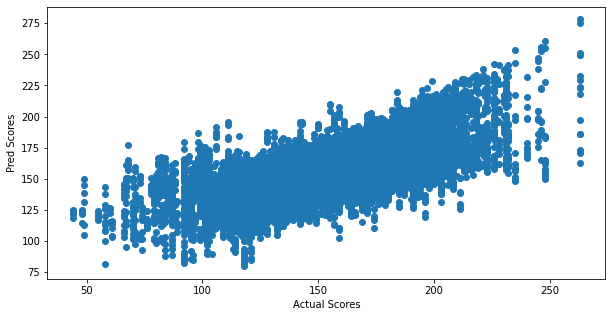

In [77]:
plt.figure(figsize=(10,5))
plt.scatter(y_test,y_pred)
plt.xlabel('Actual Scores')
plt.ylabel('Pred Scores')
plt.plot()